# Gradient Boosting

In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.regression_metrics import regression

In [2]:
train =  pd.read_parquet('../../../data/model_input/train_sets/electricity_transformer.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/electricity_transformer.parquet')

In [3]:
y_train = train.OT_next
X_train = train.drop(columns=['date', 'OT_next'])

In [4]:
y_validation = validation.OT_next
X_validation = validation.drop(columns=['date', 'OT_next'])

In [7]:
exploratory_depths =[2, 3, 4, 5]
exploratory_estimators = [25, 50, 100, 200, 300]
exploratory_learn_rate = [0.01, 0.05, 0.1, 0.5]

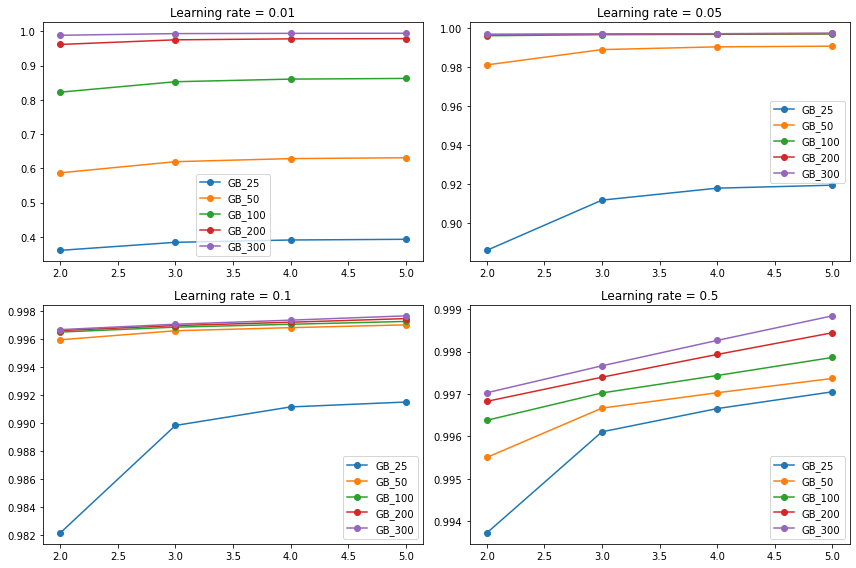

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for n in exploratory_estimators:
    axs[0, 0].plot(exploratory_depths, [GradientBoostingRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[0]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    axs[0, 1].plot(exploratory_depths, [GradientBoostingRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[1]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    axs[1, 0].plot(exploratory_depths, [GradientBoostingRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[2]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    axs[1, 1].plot(exploratory_depths, [GradientBoostingRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[3]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    
axs[0, 0].set_title('Learning rate = '+str(exploratory_learn_rate[0]))
axs[0, 0].legend()
axs[0, 1].set_title('Learning rate = '+str(exploratory_learn_rate[1]))
axs[0, 1].legend()
axs[1, 0].set_title('Learning rate = '+str(exploratory_learn_rate[2]))
axs[1, 0].legend()
axs[1, 1].set_title('Learning rate = '+str(exploratory_learn_rate[3]))
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [7]:
max_depth = [2, 3]
n_estimators = [25, 50, 75, 100, 125, 150, 175, 200, 250, 300]
learn_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]

In [8]:
models_list = []
names_list = []
for n in n_estimators:
    for d in max_depth:
        for l in learn_rate:
            models_list.append(GradientBoostingRegressor(n_estimators=n, max_depth=d, learning_rate=l))
            names_list.append('GB_'+str(n)+'_'+str(d)+'_'+str(l))

In [46]:
metrics = regression(models_list, names_list, '../../../data/model_output/metrics/electricity_transformer/gradient_boosting.csv', X_train, y_train, X_validation, y_validation, metrics={})
metrics

,Run_Time,Train_RMSE,Validation_RMSE,delta%
GB_25_2_0.001,13.760026,8.165870,12.503891,53.123805
GB_25_2_0.005,14.392497,7.464299,11.737888,57.253722
GB_25_2_0.01,14.119252,6.678038,10.865631,62.706924
GB_25_2_0.05,13.120923,2.818952,5.933620,110.490260
GB_25_2_0.1,13.597649,1.115302,2.701496,142.221118
...,...,...,...,...
GB_300_3_0.005,272.636125,2.029659,3.661457,80.397664
GB_300_3_0.01,266.932617,0.683156,1.118113,63.668706
GB_300_3_0.05,277.316234,0.461171,0.540017,17.096762
GB_300_3_0.1,277.876311,0.454148,0.650531,43.242304


In [48]:
metrics.sort_values(by='Validation_RMSE')

,Run_Time,Train_RMSE,Validation_RMSE,delta%
GB_125_3_0.05,95.856639,0.476251,0.340407,-28.523744
GB_200_2_0.05,103.069442,0.479719,0.344762,-28.132418
GB_100_2_0.1,51.567292,0.495146,0.347759,-29.766490
GB_250_2_0.05,175.313522,0.476475,0.353773,-25.752111
GB_175_2_0.05,90.055163,0.482479,0.355290,-26.361598
...,...,...,...,...
GB_75_2_0.001,38.798369,7.806949,12.114314,55.173473
GB_50_3_0.001,37.798873,7.957808,12.190157,53.184854
GB_50_2_0.001,25.716198,7.984068,12.307760,54.154006
GB_25_3_0.001,20.556045,8.152698,12.444166,52.638633


We are left with **GB_125_3_0.005**.

In [5]:
test =  pd.read_parquet('../../../data/model_input/test_sets/electricity_transformer.parquet')

In [6]:
y_test = test.OT_next
X_test = test.drop(columns=['date', 'OT_next'])

In [7]:
retrain = pd.concat([train, validation])

In [8]:
y_retrain = retrain.OT_next
X_retrain = retrain.drop(columns=['date', 'OT_next'])

In [53]:
model = GradientBoostingRegressor(n_estimators=125, max_depth=3, learning_rate=0.05).fit(X_retrain, y_retrain)

In [54]:
test_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, test_pred)
print('Test RMSE:', round(rmse, 4))

Test RMSE: 0.329


In [55]:
dump(model, '../../../data/model_output/models/electricity_transformer/best_gradient_boosting.joblib')

['best_gradient_boosting.joblib']

In [56]:
with open('../../../data/model_output/metrics/electricity_transformer/final_RMSE.txt', 'a') as f:
    f.write('\nGB, '+ str(rmse))

C:\Users\MANUEL~2\AppData\Local\Temp/ipykernel_1692/3731660872.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_retrain.min(), y_retrain.max()], [y_retrain.min(), y_retrain.max()],


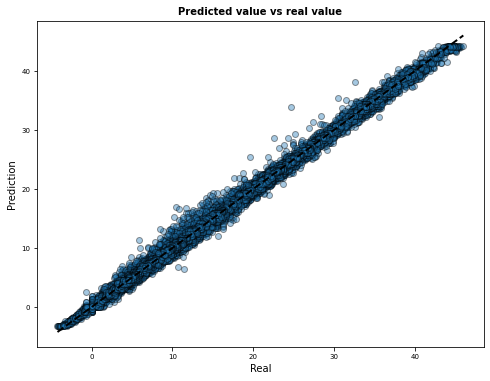

In [57]:
prediction_retrain = model.predict(X_retrain)
error_retrain   = prediction_retrain - y_retrain

plt.figure(figsize=(8, 6))

plt.scatter(y_retrain, prediction_retrain, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_retrain.min(), y_retrain.max()], [y_retrain.min(), y_retrain.max()],
                'k--', color = 'black', lw=2)
plt.title('Predicted value vs real value', fontsize = 10, fontweight = "bold")
plt.xlabel('Real')
plt.ylabel('Prediction')
plt.tick_params(labelsize = 7)

In [9]:
from joblib import load
load_mod = load('../../../data/model_output/models/electricity_transformer/best_gradient_boosting.joblib')

In [10]:
train_pred = load_mod.predict(X_retrain)
rmse_train = root_mean_squared_error(y_retrain, train_pred)
test_pred = load_mod.predict(X_test)
rmse_test = root_mean_squared_error(y_test, test_pred)

In [11]:
import time 
time1 = time.time()
GradientBoostingRegressor(n_estimators=125, max_depth=3, learning_rate=0.05).fit(X_retrain, y_retrain)
time2 = time.time() - time1 

In [12]:
with open('../../../data/model_output/metrics/electricity_transformer/final_metrics.txt', 'a') as f:
     f.write(f'\nGB; {time2}; {rmse_train}; {rmse_test}')